In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# load the dataset
task_table = pd.read_csv('task_table.csv')
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
0,3e6f005d5fc08a0108f4eb1e,ps,1,Terminated,675282,675318,600.0,29.296875,NaN,NaN
1,aa93a6ed0b24235487081bf1,ps,1,Terminated,731739,731772,600.0,29.296875,NaN,NaN
2,96e053818c246cd68f301d40,ps,2,Terminated,591455,802150,200.0,4.882812,NaN,NaN
3,10e530eb422cec7bb19c6fd7,ps,1,Terminated,687588,807680,100.0,0.976562,NaN,NaN
4,2883edbad23c6bef16f655c0,ps,1,Terminated,610350,813276,100.0,0.976562,NaN,NaN


In [2]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = task_table.corr()

# Print the correlation matrix
print(corr_matrix)


            inst_num  start_time  end_time  plan_cpu  plan_mem  plan_gpu
inst_num    1.000000   -0.000845 -0.000052 -0.048678 -0.085548 -0.112665
start_time -0.000845    1.000000  0.999790  0.006421 -0.002673  0.001303
end_time   -0.000052    0.999790  1.000000  0.008489 -0.000806  0.002846
plan_cpu   -0.048678    0.006421  0.008489  1.000000  0.500814  0.259014
plan_mem   -0.085548   -0.002673 -0.000806  0.500814  1.000000  0.356731
plan_gpu   -0.112665    0.001303  0.002846  0.259014  0.356731  1.000000


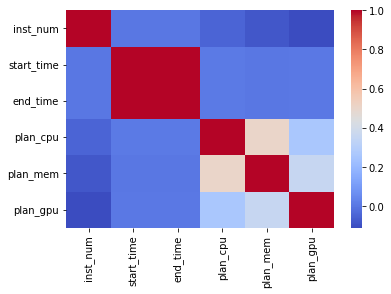

In [3]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


In [4]:
# load the dataset
machine_metrics = pd.read_csv('machine_metric.csv')
machine_metrics.head()

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,5248e29b2b7f2b5f8b974608,2134401,2134599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,384588331.2,15.672816,49.391271
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,702799379.2,14.234469,50.949074
3,8a3db37b3795c7c753963d0ef966df9703d39b9f918e1a...,5248e29b2b7f2b5f8b974608,2119980,2134354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f114ac24745ec00da7107387afc99ed7cd8132530e8ef7...,5248e29b2b7f2b5f8b974608,2164803,2171278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = machine_metrics.corr()

# Print the correlation matrix
print(corr_matrix)


                     start_time  end_time  machine_cpu_iowait  \
start_time             1.000000  0.999821            0.030273   
end_time               0.999821  1.000000            0.030174   
machine_cpu_iowait     0.030273  0.030174            1.000000   
machine_cpu_kernel     0.128918  0.128548           -0.109445   
machine_cpu_usr        0.133859  0.133306           -0.112754   
machine_gpu           -0.013282 -0.012931           -0.129364   
machine_load_1         0.157673  0.157050           -0.086610   
machine_net_receive    0.062167  0.061508           -0.090187   
machine_num_worker     0.219809  0.218300           -0.108674   
machine_cpu            0.156670  0.156095           -0.157836   

                     machine_cpu_kernel  machine_cpu_usr  machine_gpu  \
start_time                     0.128918         0.133859    -0.013282   
end_time                       0.128548         0.133306    -0.012931   
machine_cpu_iowait            -0.109445        -0.112754    -0.12

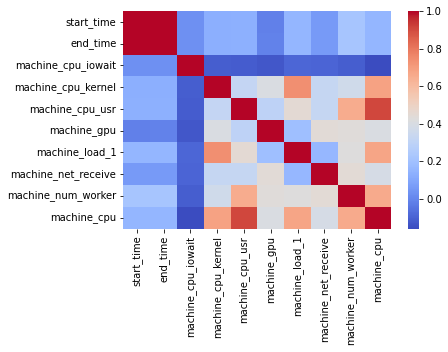

In [6]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Here we are finding runtime beacuse we have no run time coloumn in our machine metrics

In [7]:
end_time=machine_metrics["end_time"]
start_time=machine_metrics["start_time"]

In [8]:
run_time=[]
for i,j in zip(end_time,start_time):
    r=i-j
    run_time.append(r)

In [9]:
run_time

[198,
 113,
 321,
 14374,
 6475,
 9709,
 9554,
 13761,
 13502,
 8196,
 3887,
 12090,
 6286,
 3392,
 16765,
 2837,
 5703,
 17684,
 13511,
 7822,
 7471,
 16125,
 830,
 8829,
 134,
 4904,
 3662,
 10278,
 6409,
 5002,
 3905,
 30776,
 3146,
 904,
 1644,
 1000,
 874,
 3218,
 4397,
 2435,
 1079,
 4240,
 5657,
 5277,
 913,
 3241,
 6363,
 6396,
 3309,
 7887,
 5424,
 2454,
 2367,
 7333,
 8263,
 6263,
 8744,
 5626,
 5819,
 11664,
 2207,
 1899,
 1294,
 471,
 522,
 969,
 1054,
 3792,
 191878,
 36581,
 43260,
 1054,
 38536,
 709,
 467,
 1033,
 60677,
 52183,
 41863,
 1673,
 1432,
 1447,
 1489,
 20579,
 8185,
 355,
 1195,
 1096,
 19607,
 235,
 242,
 234,
 5522,
 525,
 269,
 23,
 23,
 244,
 42532,
 4799,
 62,
 1925,
 24,
 12,
 13,
 191,
 51,
 65,
 837,
 824,
 265,
 484,
 213,
 836,
 169,
 728,
 217,
 8020,
 159,
 228,
 31722,
 8227,
 7982,
 28405,
 2670,
 8069,
 8651,
 1020,
 1091,
 5469,
 3584,
 1026,
 1854,
 5476,
 857,
 3847,
 17767,
 6941,
 10055,
 4866,
 6268,
 125,
 977,
 1681,
 214,
 458,
 2064

In [10]:
machine_metrics['run_time'] = run_time


In [11]:
machine_metrics

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
0,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,5248e29b2b7f2b5f8b974608,2134401,2134599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,3.845883e+08,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,7.027994e+08,14.234469,50.949074,321
3,8a3db37b3795c7c753963d0ef966df9703d39b9f918e1a...,5248e29b2b7f2b5f8b974608,2119980,2134354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14374
4,f114ac24745ec00da7107387afc99ed7cd8132530e8ef7...,5248e29b2b7f2b5f8b974608,2164803,2171278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,adee9d2bd7265e9c6a3a9b599ac147f1ad9cc34e56f0d5...,274faea7c2b83356d5de3b77,3132103,3133131,0.004562,4.102616,17.383334,51.223102,21.956170,5.512585e+08,5.043801,21.490512,1028
499995,fcf321bd4d26c893574e29d2e17740e3d61015b05a84f6...,274faea7c2b83356d5de3b77,3211881,3211982,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,101
499996,bdc422a0fc9e4e9f47c4deea474db2bca79c1c626e369a...,274faea7c2b83356d5de3b77,3211882,3211973,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,91
499997,32d57bdcdcca54e964f75fcba6c975f5b1eb5258727f81...,274faea7c2b83356d5de3b77,3244419,3244470,0.002670,1.787369,18.590296,21.676219,20.071826,5.256312e+07,5.345062,20.380335,51


In [12]:
machine_metrics.isnull().sum()

worker_name                0
machine                    0
start_time                 0
end_time                   0
machine_cpu_iowait     42111
machine_cpu_kernel     59422
machine_cpu_usr        43613
machine_gpu            53859
machine_load_1         50347
machine_net_receive    46597
machine_num_worker     52708
machine_cpu            60953
run_time                   0
dtype: int64

In [13]:
machine_metrics.dropna(inplace=True)

In [14]:
machine_metrics.head()

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,384588331.2,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,702799379.2,14.234469,50.949074,321
7,7f1f4d76602d2071cb959a7ec47873e1007bee8046b2dd...,5248e29b2b7f2b5f8b974608,2659273,2673034,0.000614,7.683578,30.595101,498.010627,74.101198,314312965.7,12.209609,38.279293,13761
8,6ecadb953221add9491f244051114c7a2c4d5c63b7ffe3...,5248e29b2b7f2b5f8b974608,2660994,2674496,0.000622,7.427590,29.311445,494.623959,64.539163,318783570.7,12.199445,36.739657,13502
9,66ae3b379970ed9246766f1e7b473b5913f10917ae0aed...,5248e29b2b7f2b5f8b974608,2826419,2834615,0.005638,8.428983,37.379467,231.566358,79.317289,435045795.8,15.794257,45.814088,8196


In [15]:
task_table.isnull().sum()

job_name          0
task_name         0
inst_num          0
status            0
start_time        0
end_time          0
plan_cpu        351
plan_mem        351
plan_gpu      99150
gpu_type      99009
dtype: int64

In [16]:
task_table.dropna(inplace=True)

In [17]:
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC


In [18]:
machine_metrics.drop('start_time', axis=1, inplace=True)

In [19]:
machine_metrics.drop('end_time', axis=1, inplace=True)

In [20]:
machine_metrics

,worker_name,machine,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,0.006080,9.226264,40.158927,192.551088,89.731273,3.845883e+08,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,0.000699,10.140853,40.807522,150.497242,72.377214,7.027994e+08,14.234469,50.949074,321
7,7f1f4d76602d2071cb959a7ec47873e1007bee8046b2dd...,5248e29b2b7f2b5f8b974608,0.000614,7.683578,30.595101,498.010627,74.101198,3.143130e+08,12.209609,38.279293,13761
8,6ecadb953221add9491f244051114c7a2c4d5c63b7ffe3...,5248e29b2b7f2b5f8b974608,0.000622,7.427590,29.311445,494.623959,64.539163,3.187836e+08,12.199445,36.739657,13502
9,66ae3b379970ed9246766f1e7b473b5913f10917ae0aed...,5248e29b2b7f2b5f8b974608,0.005638,8.428983,37.379467,231.566358,79.317289,4.350458e+08,15.794257,45.814088,8196
...,...,...,...,...,...,...,...,...,...,...,...
499994,adee9d2bd7265e9c6a3a9b599ac147f1ad9cc34e56f0d5...,274faea7c2b83356d5de3b77,0.004562,4.102616,17.383334,51.223102,21.956170,5.512585e+08,5.043801,21.490512,1028
499995,fcf321bd4d26c893574e29d2e17740e3d61015b05a84f6...,274faea7c2b83356d5de3b77,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,101
499996,bdc422a0fc9e4e9f47c4deea474db2bca79c1c626e369a...,274faea7c2b83356d5de3b77,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,91
499997,32d57bdcdcca54e964f75fcba6c975f5b1eb5258727f81...,274faea7c2b83356d5de3b77,0.002670,1.787369,18.590296,21.676219,20.071826,5.256312e+07,5.345062,20.380335,51


In [21]:
task_table

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC
...,...,...,...,...,...,...,...,...,...,...
499994,76f391e1deed03eb87ade370,tensorflow,1,Terminated,4480035,4483303,600.0,29.296875,100.0,MISC
499995,64002d792fba760cddebd253,tensorflow,1,Terminated,4482654,4483307,600.0,29.296875,100.0,P100
499996,fe3990737fef541f2f4dc6dd,tensorflow,1,Terminated,4482651,4483320,600.0,29.296875,100.0,P100
499997,e162cfb7391cd08ff4bcc7e5,tensorflow,1,Terminated,4482936,4483322,600.0,29.296875,25.0,T4


In [22]:
#Here we are selectiong our columns
col_to_add = machine_metrics[['run_time', 'machine_cpu_iowait','machine_cpu_kernel','machine','machine_load_1','machine_cpu']]

In [23]:
#here we are merging our both tables
for col in col_to_add:
    task_table[col] = machine_metrics[col]

In [24]:
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,machine_load_1,machine_cpu
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4,5424.0,0.000470,10.374486,5248e29b2b7f2b5f8b974608,145.808261,71.948594
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC,2454.0,0.000894,6.380204,5248e29b2b7f2b5f8b974608,25.271145,26.066257


In [25]:
task_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400849 entries, 44 to 499998
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   job_name            400849 non-null  object 
 1   task_name           400849 non-null  object 
 2   inst_num            400849 non-null  int64  
 3   status              400849 non-null  object 
 4   start_time          400849 non-null  int64  
 5   end_time            400849 non-null  int64  
 6   plan_cpu            400849 non-null  float64
 7   plan_mem            400849 non-null  float64
 8   plan_gpu            400849 non-null  float64
 9   gpu_type            400849 non-null  object 
 10  run_time            328573 non-null  float64
 11  machine_cpu_iowait  328573 non-null  float64
 12  machine_cpu_kernel  328573 non-null  float64
 13  machine             328573 non-null  object 
 14  machine_load_1      328573 non-null  float64
 15  machine_cpu         328573 non-nu

In [26]:
task_table.isnull().sum()

job_name                  0
task_name                 0
inst_num                  0
status                    0
start_time                0
end_time                  0
plan_cpu                  0
plan_mem                  0
plan_gpu                  0
gpu_type                  0
run_time              72276
machine_cpu_iowait    72276
machine_cpu_kernel    72276
machine               72276
machine_load_1        72276
machine_cpu           72276
dtype: int64

In [27]:
task_table.drop(['job_name', 'task_name'], axis=1, inplace=True)

In [28]:
task_table.dropna(inplace=True)

In [29]:
task_table

,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,machine_load_1,machine_cpu
50,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4,5424.0,0.000470,10.374486,5248e29b2b7f2b5f8b974608,145.808261,71.948594
51,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC,2454.0,0.000894,6.380204,5248e29b2b7f2b5f8b974608,25.271145,26.066257
52,50,Terminated,1089298,1094522,400.0,19.531250,50.0,MISC,2367.0,0.001701,24.821035,5248e29b2b7f2b5f8b974608,215.624891,59.594216
54,1,Terminated,1094446,1094526,600.0,29.296875,100.0,MISC,8263.0,0.005904,8.922031,5248e29b2b7f2b5f8b974608,81.486085,46.221823
55,1,Terminated,1094103,1094544,1000.0,19.550781,50.0,T4,6263.0,0.001435,8.766022,5248e29b2b7f2b5f8b974608,95.594414,61.367088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1,Terminated,4480035,4483303,600.0,29.296875,100.0,MISC,1028.0,0.004562,4.102616,274faea7c2b83356d5de3b77,21.956170,21.490512
499995,1,Terminated,4482654,4483307,600.0,29.296875,100.0,P100,101.0,0.002716,1.676733,274faea7c2b83356d5de3b77,18.782778,19.122290
499996,1,Terminated,4482651,4483320,600.0,29.296875,100.0,P100,91.0,0.002716,1.676733,274faea7c2b83356d5de3b77,18.782778,19.122290
499997,1,Terminated,4482936,4483322,600.0,29.296875,25.0,T4,51.0,0.002670,1.787369,274faea7c2b83356d5de3b77,20.071826,20.380335


In [30]:
#Here we are converting our categorical data into Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert object columns to int label encoding
label_encoder = LabelEncoder()
task_table['gpu_type'] = label_encoder.fit_transform(task_table['gpu_type'])
task_table['status'] = label_encoder.fit_transform(task_table['status'])
task_table['machine'] = label_encoder.fit_transform(task_table['machine'])
task_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328573 entries, 50 to 499998
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inst_num            328573 non-null  int64  
 1   status              328573 non-null  int32  
 2   start_time          328573 non-null  int64  
 3   end_time            328573 non-null  int64  
 4   plan_cpu            328573 non-null  float64
 5   plan_mem            328573 non-null  float64
 6   plan_gpu            328573 non-null  float64
 7   gpu_type            328573 non-null  int32  
 8   run_time            328573 non-null  float64
 9   machine_cpu_iowait  328573 non-null  float64
 10  machine_cpu_kernel  328573 non-null  float64
 11  machine             328573 non-null  int32  
 12  machine_load_1      328573 non-null  float64
 13  machine_cpu         328573 non-null  float64
dtypes: float64(8), int32(3), int64(3)
memory usage: 33.8 MB


In [31]:
task_table.shape

(328573, 14)

In [32]:
task_table = task_table.rename({'machine_load_1': 'memory', 'machine_cpu': 'cpu'}, axis=1)  # new method

In [33]:
task_table

,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,memory,cpu
50,1,2,1094446,1094492,1800.0,58.593750,100.0,2,5424.0,0.000470,10.374486,257,145.808261,71.948594
51,1,2,1094430,1094514,600.0,29.296875,100.0,0,2454.0,0.000894,6.380204,257,25.271145,26.066257
52,50,2,1089298,1094522,400.0,19.531250,50.0,0,2367.0,0.001701,24.821035,257,215.624891,59.594216
54,1,2,1094446,1094526,600.0,29.296875,100.0,0,8263.0,0.005904,8.922031,257,81.486085,46.221823
55,1,2,1094103,1094544,1000.0,19.550781,50.0,2,6263.0,0.001435,8.766022,257,95.594414,61.367088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1,2,4480035,4483303,600.0,29.296875,100.0,0,1028.0,0.004562,4.102616,120,21.956170,21.490512
499995,1,2,4482654,4483307,600.0,29.296875,100.0,1,101.0,0.002716,1.676733,120,18.782778,19.122290
499996,1,2,4482651,4483320,600.0,29.296875,100.0,1,91.0,0.002716,1.676733,120,18.782778,19.122290
499997,1,2,4482936,4483322,600.0,29.296875,25.0,2,51.0,0.002670,1.787369,120,20.071826,20.380335


In [34]:
#This is our output features we stored in a target
target = task_table[['run_time','cpu','memory']]

In [35]:
target

,run_time,cpu,memory
50,5424.0,71.948594,145.808261
51,2454.0,26.066257,25.271145
52,2367.0,59.594216,215.624891
54,8263.0,46.221823,81.486085
55,6263.0,61.367088,95.594414
...,...,...,...
499994,1028.0,21.490512,21.956170
499995,101.0,19.122290,18.782778
499996,91.0,19.122290,18.782778
499997,51.0,20.380335,20.071826


In [36]:
p=5
pr = []
for index, row in target.iterrows():
    k=row['run_time'], row['cpu'], row['memory']          #if it gave an error so ignore it and run further cells
    pr.append(k)

In [37]:
pr[0],pr[1],pr[2]

((5424.0, 71.94859417, 145.8082606),
 (2454.0, 26.06625703, 25.27114484),
 (2367.0, 59.59421586, 215.6248914))

In [38]:
type(pr[0])

tuple

In [39]:
#This our input features we stored in a variable val
val=task_table[['plan_cpu', 'inst_num', 'status','plan_mem','plan_gpu','gpu_type','start_time','end_time']]

In [40]:
val

,plan_cpu,inst_num,status,plan_mem,plan_gpu,gpu_type,start_time,end_time
50,1800.0,1,2,58.593750,100.0,2,1094446,1094492
51,600.0,1,2,29.296875,100.0,0,1094430,1094514
52,400.0,50,2,19.531250,50.0,0,1089298,1094522
54,600.0,1,2,29.296875,100.0,0,1094446,1094526
55,1000.0,1,2,19.550781,50.0,2,1094103,1094544
...,...,...,...,...,...,...,...,...
499994,600.0,1,2,29.296875,100.0,0,4480035,4483303
499995,600.0,1,2,29.296875,100.0,1,4482654,4483307
499996,600.0,1,2,29.296875,100.0,1,4482651,4483320
499997,600.0,1,2,29.296875,25.0,2,4482936,4483322


In [41]:
#Here we are making 5 5 instances 
import pandas as pd
sets_of_5 = []
# iterate over the dataframe by increments of 5 rows
for i in range(0, len(val), 5):
    # extract the next 5 rows from the dataframe
    set_of_5 = val.iloc[i:i+5].reset_index(drop=True)
    # reset the index and drop the column names
    set_of_5.columns = ["" for col in set_of_5.columns]
    # append the set of 5 rows to the list
    sets_of_5.append(set_of_5)

# print the list of sets of 5 rows
print(sets_of_5[0])


                                                       
0  1800.0   1  2  58.593750  100.0  2  1094446  1094492
1   600.0   1  2  29.296875  100.0  0  1094430  1094514
2   400.0  50  2  19.531250   50.0  0  1089298  1094522
3   600.0   1  2  29.296875  100.0  0  1094446  1094526
4  1000.0   1  2  19.550781   50.0  2  1094103  1094544


In [42]:
val=sets_of_5

In [43]:
len(val)

65715

* Here we have to variables name val and pr 
* in a varaible val we have our set of 5 5 
* and in a variable pr we have a set of 6th values which we have to give as target value on the basis of previous 5 sets our model predicts the 6th instance

In [44]:
len(pr),len(val)

(328573, 65715)

In [45]:
pr = pr[:len(val)]    

In [46]:
len(pr),len(val)

(65715, 65715)

In [47]:
type(pr[1]),type(val[1])

(tuple, pandas.core.frame.DataFrame)

In [48]:
#Here we are converting a data into Type list Because we have to convert Our Dataframe 
#into list to merge a above val and pr to make a single row becuase val type is list and pr is dataframe
import pandas as pd
from itertools import chain
# create a sample DataFrame
df = val[1]
# convert DataFrame to 1D list using nested list comprehension
flat_list = [item for sublist in df.values.tolist() for item in sublist]
# convert DataFrame to 1D list using itertools.chain()
flat_list = list(chain.from_iterable(df.values.tolist()))

print(flat_list)


[600.0, 50.0, 2.0, 19.53125, 50.0, 0.0, 1093054.0, 1094546.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 2.0, 1094523.0, 1094547.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 0.0, 1094461.0, 1094561.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 0.0, 1094500.0, 1094563.0, 800.0, 1.0, 2.0, 19.53125, 100.0, 2.0, 1094524.0, 1094578.0]


In [49]:
#Here we are making a time series dataset by merging a val and pr 
from itertools import chain
dataset = []
for i in range(len(pr)):
    df = val[i]
# convert DataFrame to 1D list using nested list comprehension
    flat_list = [item for sublist in df.values.tolist() for item in sublist]
# convert DataFrame to 1D list using itertools.chain()
    flat_list = list(chain.from_iterable(df.values.tolist()))
    row = list(flat_list)
    #row.append(list(pr[i]))
    str_list =list(pr[i])
    float_list = [float(x) for x in str_list]
    k=float_list
    float_list = k
    split_list = [str(x).split(',') for x in float_list]
    #print(split_list[2])
    row.append(split_list[0])
    row.append(split_list[1])
    row.append(split_list[2])
    dataset.append(row)

In [50]:
dataset[1]

[600.0,
 50.0,
 2.0,
 19.53125,
 50.0,
 0.0,
 1093054.0,
 1094546.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 2.0,
 1094523.0,
 1094547.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 1094461.0,
 1094561.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 1094500.0,
 1094563.0,
 800.0,
 1.0,
 2.0,
 19.53125,
 100.0,
 2.0,
 1094524.0,
 1094578.0,
 ['2454.0'],
 ['26.06625703'],
 ['25.27114484']]

In [51]:
len(dataset), np.array(dataset).shape,type(dataset)

C:\Users\Muhammad Ansar\AppData\Local\Temp\ipykernel_10848\3057848479.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  len(dataset), np.array(dataset).shape,type(dataset)


(65715, (65715,), list)

In [52]:
#Here we are shuffling our data becuase shuffling the data before feed to 
#our model is best practice there is no hard and fast rule behind shuffling the data
dataset = np.array(dataset)
np.random.shuffle(dataset)
np.random.shuffle(dataset)
dataset.shape

C:\Users\Muhammad Ansar\AppData\Local\Temp\ipykernel_10848\683501590.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(dataset)


(65715,)

In [53]:
dataset[3]

[600.0,
 1.0,
 2.0,
 2.9296875,
 100.0,
 0.0,
 2730717.0,
 2730771.0,
 600.0,
 1.0,
 2.0,
 2.9296875,
 100.0,
 0.0,
 2730719.0,
 2730771.0,
 400.0,
 60.0,
 2.0,
 14.6484375,
 25.0,
 0.0,
 2727806.0,
 2730777.0,
 1600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 2730686.0,
 2730832.0,
 600.0,
 30.0,
 2.0,
 4.0,
 50.0,
 2.0,
 2725806.0,
 2730837.0,
 ['102.0'],
 ['53.25042448'],
 ['71.32731537']]

In [54]:


dataset2 = list(dataset)                           # dataset2 = dataset
append_item = dataset[0]                           # length = len(dataset2)
                                                   # # shape = dataset2[0].shape
dataset2[0] = ["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15","v16","v17","v18","v19","v20","v21","v22","v23","v24","v25","v26","v27","v28","v29","v30","v31","v32","v33","v34","v35","v36","v37","v38","v39","v40","target","target1","target2"]  # print(length,type(dataset2))

dataset2.append(append_item)
len(dataset2),len(dataset)                      # header = ["value1","value2","value3","value4","value5","target"]
                                                # dataset2 = np.insert(dataset2,0,header)
                                                # # dataset2 = dataset2.reshape( (length+1, 6 ) )
                                                # # len(dataset2),dataset2.shap

(65716, 65715)

In [55]:
np.array(dataset2).shape, dataset2[:10]

C:\Users\Muhammad Ansar\AppData\Local\Temp\ipykernel_10848\2837045535.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dataset2).shape, dataset2[:10]


((65716,),
 [['v1',
   'v2',
   'v3',
   'v4',
   'v5',
   'v6',
   'v7',
   'v8',
   'v9',
   'v10',
   'v11',
   'v12',
   'v13',
   'v14',
   'v15',
   'v16',
   'v17',
   'v18',
   'v19',
   'v20',
   'v21',
   'v22',
   'v23',
   'v24',
   'v25',
   'v26',
   'v27',
   'v28',
   'v29',
   'v30',
   'v31',
   'v32',
   'v33',
   'v34',
   'v35',
   'v36',
   'v37',
   'v38',
   'v39',
   'v40',
   'target',
   'target1',
   'target2'],
  [600.0,
   1.0,
   2.0,
   29.296875,
   25.0,
   0.0,
   2043170.0,
   2043291.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   100.0,
   0.0,
   2043235.0,
   2043310.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   100.0,
   0.0,
   2034506.0,
   2043401.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   100.0,
   0.0,
   2043287.0,
   2043419.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   100.0,
   2.0,
   2043220.0,
   2043446.0,
   ['1182.0'],
   ['62.13068539'],
   ['269.8413258']],
  [600.0,
   1.0,
   2.0,
   29.296875,
   100.0,
   0.0,
   4026062.0,

In [56]:
dataset2[5]

[600.0,
 12.0,
 2.0,
 2.0,
 25.0,
 2.0,
 2065005.0,
 2066449.0,
 600.0,
 1.0,
 2.0,
 4.0,
 50.0,
 2.0,
 2066433.0,
 2066456.0,
 1000.0,
 8.0,
 2.0,
 39.0625,
 100.0,
 0.0,
 1953021.0,
 2066471.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 1.0,
 2064060.0,
 2066483.0,
 600.0,
 15.0,
 2.0,
 19.53125,
 25.0,
 0.0,
 2063132.0,
 2066487.0,
 ['2195.0'],
 ['38.37052004'],
 ['73.64688856']]

In [57]:
import csv
with open('alibaba2020times.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset2)

In [58]:
data = pd.read_csv("alibaba2020times.csv")

C:\Users\Muhammad Ansar\AppData\Local\Temp\ipykernel_10848\2345711845.py:1: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("alibaba2020times.csv")


In [59]:
#So as we have 8 columns in our task features so we make a 5 – 5 sets of 
#each columns to give to our time series model that’s why it’s looks like 40 inputs . 
#our purpose is that to apply time series . so we give this to our model and we give 5 
#instances to our model and  on the basis of these five instances our model predicts the sixth instance it self
data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v34,v35,v36,v37,v38,v39,v40,target,target1,target2
0,600.0,1.0,2.0,29.296875,25.0,0.0,2043170.0,2043291.0,600.0,1.0,...,1.0,2.0,29.296875,100.0,2.0,2043220.0,2043446.0,['1182.0'],['62.13068539'],['269.8413258']
1,600.0,1.0,2.0,29.296875,100.0,0.0,4026062.0,4026131.0,600.0,1.0,...,20.0,2.0,15.625000,100.0,1.0,4016195.0,4026155.0,['149.0'],['86.90255305'],['211.475515']
2,600.0,1.0,2.0,2.929688,100.0,0.0,2730717.0,2730771.0,600.0,1.0,...,30.0,2.0,4.000000,50.0,2.0,2725806.0,2730837.0,['102.0'],['53.25042448'],['71.32731537']
3,600.0,1.0,2.0,29.296875,100.0,2.0,3011532.0,3011586.0,600.0,1.0,...,1.0,2.0,29.296875,100.0,2.0,3011469.0,3011623.0,['3023.0'],['46.65330831'],['52.24508591']
4,600.0,12.0,2.0,2.000000,25.0,2.0,2065005.0,2066449.0,600.0,1.0,...,15.0,2.0,19.531250,25.0,0.0,2063132.0,2066487.0,['2195.0'],['38.37052004'],['73.64688856']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65710,1800.0,1.0,2.0,58.593750,100.0,1.0,3299558.0,3303461.0,1800.0,1.0,...,1.0,2.0,58.593750,100.0,1.0,3299558.0,3303489.0,['1040.0'],['18.34947011'],['17.72341912']
65711,600.0,20.0,2.0,31.250000,100.0,0.0,3806299.0,3806453.0,600.0,1.0,...,4.0,2.0,58.593750,100.0,1.0,3800838.0,3806639.0,['878.0'],['78.54388465'],['443.4419148']
65712,600.0,1.0,2.0,29.296875,100.0,2.0,1281216.0,1282115.0,20.0,1.0,...,1.0,2.0,29.296875,100.0,2.0,1281249.0,1282148.0,['33.0'],['35.57554022'],['46.75005067']
65713,600.0,1.0,2.0,29.296875,10.0,0.0,1850405.0,1859781.0,1800.0,1.0,...,1.0,2.0,29.296875,25.0,0.0,1859745.0,1859798.0,['22726.0'],['43.92301785'],['62.3034358']


                     machine_cpu_iowait  machine_cpu_kernel  machine_cpu_usr  \
machine_cpu_iowait             1.000000           -0.106005        -0.139512   
machine_cpu_kernel            -0.106005            1.000000         0.325947   
machine_cpu_usr               -0.139512            0.325947         1.000000   
machine_gpu                   -0.146288            0.421155         0.296148   
machine_load_1                -0.103960            0.734867         0.460227   
machine_net_receive           -0.103955            0.333461         0.316789   
machine_num_worker            -0.144434            0.361601         0.643017   
machine_cpu                   -0.153091            0.688332         0.910140   
run_time                      -0.004168           -0.020375        -0.027637   

                     machine_gpu  machine_load_1  machine_net_receive  \
machine_cpu_iowait     -0.146288       -0.103960            -0.103955   
machine_cpu_kernel      0.421155        0.734867     

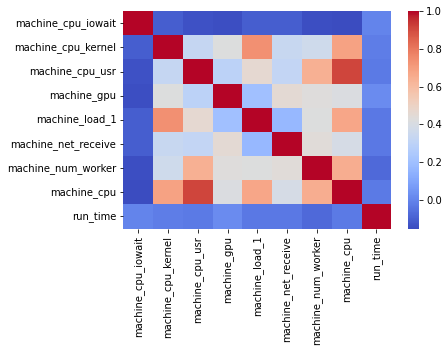

In [60]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = machine_metrics.corr()

# Print the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


#  In the Below lines of code we are just converting our data types in float before give our model becuase Machine learning only knows abouts numbers
# And removing some garbage like commas space and normizling our data

In [61]:
my_target=[]
for i in range(0,65715):
    my_string = str(data["target"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target.append(my_float)

In [62]:
my_target

[1182.0,
 149.0,
 102.0,
 3023.0,
 2195.0,
 2248.0,
 1112.0,
 995.0,
 563.0,
 111.0,
 15011.0,
 7.0,
 5301.0,
 23104.0,
 1813.0,
 276.0,
 1053.0,
 164.0,
 10457.0,
 6812.0,
 5676.0,
 6836.0,
 547.0,
 1832.0,
 2084.0,
 35.0,
 23273.0,
 736.0,
 198.0,
 777.0,
 3505.0,
 19214.0,
 5515.0,
 2500.0,
 1836.0,
 96.0,
 31.0,
 1274.0,
 1055.0,
 10.0,
 11843.0,
 2854.0,
 15435.0,
 395.0,
 96.0,
 113.0,
 21.0,
 22.0,
 2547.0,
 21429.0,
 326.0,
 203.0,
 214.0,
 93.0,
 144.0,
 702.0,
 36883.0,
 67771.0,
 18888.0,
 84.0,
 770.0,
 3228.0,
 91.0,
 4340.0,
 301.0,
 2446.0,
 6871.0,
 426.0,
 4920.0,
 3878.0,
 32480.0,
 376.0,
 7599.0,
 492.0,
 22.0,
 1272.0,
 1101.0,
 561.0,
 108678.0,
 250.0,
 1699.0,
 523.0,
 222.0,
 90.0,
 31.0,
 34992.0,
 1163.0,
 2756.0,
 1112.0,
 28133.0,
 22946.0,
 10569.0,
 418.0,
 1125.0,
 73.0,
 578.0,
 21.0,
 1684.0,
 525.0,
 3986.0,
 13177.0,
 965.0,
 272.0,
 1181.0,
 1008.0,
 205.0,
 1284.0,
 1860.0,
 13486.0,
 471.0,
 103.0,
 83.0,
 102.0,
 234.0,
 59.0,
 153.0,
 2803.0,
 4

In [63]:
my_target = pd.DataFrame({'my_target': my_target})

In [64]:
my_target["my_target"]

0         1182.0
1          149.0
2          102.0
3         3023.0
4         2195.0
          ...   
65710     1040.0
65711      878.0
65712       33.0
65713    22726.0
65714       32.0
Name: my_target, Length: 65715, dtype: float64

In [65]:
my_target1=[]
for i in range(0,65715):
    my_string = str(data["target1"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target1.append(my_float)

In [66]:
my_target1 = pd.DataFrame({'my_target1': my_target1})

In [67]:
my_target2=[]
for i in range(0,65715):
    my_string = str(data["target2"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target2.append(my_float)

In [68]:
my_target2 = pd.DataFrame({'my_target2': my_target2})

In [69]:
data['target'] = my_target['my_target']

In [70]:
data['target1'] = my_target1['my_target1']

In [71]:
data['target2'] = my_target2['my_target2']

In [72]:
my_v25=[]
for i in range(0,65715):
    my_string = str(data["v25"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v25.append(my_float)

In [73]:
my_v25 = pd.DataFrame({'my_v25': my_v25})

In [74]:
my_v26=[]
for i in range(0,65715):
    my_string = str(data["v26"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v26.append(my_float)

In [75]:
my_v26 = pd.DataFrame({'my_v26': my_v26})

In [76]:
my_v27=[]
for i in range(0,65715):
    my_string = str(data["v27"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v27.append(my_float)

In [77]:
my_v27 = pd.DataFrame({'my_v27': my_v27})

In [78]:
data['v25'] = my_v25['my_v25']
data['v26'] = my_v26['my_v26']
data['v27'] = my_v27['my_v27']

In [79]:
data.dropna(inplace=True)

In [80]:
data.isnull().sum()

v1         0
v2         0
v3         0
v4         0
v5         0
v6         0
v7         0
v8         0
v9         0
v10        0
v11        0
v12        0
v13        0
v14        0
v15        0
v16        0
v17        0
v18        0
v19        0
v20        0
v21        0
v22        0
v23        0
v24        0
v25        0
v26        0
v27        0
v28        0
v29        0
v30        0
v31        0
v32        0
v33        0
v34        0
v35        0
v36        0
v37        0
v38        0
v39        0
v40        0
target     0
target1    0
target2    0
dtype: int64

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65714 entries, 0 to 65714
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   v1       65714 non-null  float64
 1   v2       65714 non-null  float64
 2   v3       65714 non-null  float64
 3   v4       65714 non-null  float64
 4   v5       65714 non-null  float64
 5   v6       65714 non-null  float64
 6   v7       65714 non-null  float64
 7   v8       65714 non-null  float64
 8   v9       65714 non-null  float64
 9   v10      65714 non-null  float64
 10  v11      65714 non-null  float64
 11  v12      65714 non-null  float64
 12  v13      65714 non-null  float64
 13  v14      65714 non-null  float64
 14  v15      65714 non-null  float64
 15  v16      65714 non-null  float64
 16  v17      65714 non-null  float64
 17  v18      65714 non-null  float64
 18  v19      65714 non-null  float64
 19  v20      65714 non-null  float64
 20  v21      65714 non-null  float64
 21  v22      657

In [82]:
# IN THIS SECTIONS WE ARE SELECTIONG OUR INPUT AND TARGET FEATURES
Y = data[["target","target1","target2"]]
X = data.drop(columns = ["target","target1","target2"] )
X.head() ,Y.head()


(      v1    v2   v3         v4     v5   v6         v7         v8     v9  v10  \
 0  600.0   1.0  2.0  29.296875   25.0  0.0  2043170.0  2043291.0  600.0  1.0   
 1  600.0   1.0  2.0  29.296875  100.0  0.0  4026062.0  4026131.0  600.0  1.0   
 2  600.0   1.0  2.0   2.929688  100.0  0.0  2730717.0  2730771.0  600.0  1.0   
 3  600.0   1.0  2.0  29.296875  100.0  2.0  3011532.0  3011586.0  600.0  1.0   
 4  600.0  12.0  2.0   2.000000   25.0  2.0  2065005.0  2066449.0  600.0  1.0   
 
    ...        v31        v32    v33   v34  v35        v36    v37  v38  \
 0  ...  2043287.0  2043419.0  600.0   1.0  2.0  29.296875  100.0  2.0   
 1  ...  4025582.0  4026150.0  800.0  20.0  2.0  15.625000  100.0  1.0   
 2  ...  2730686.0  2730832.0  600.0  30.0  2.0   4.000000   50.0  2.0   
 3  ...  3005295.0  3011589.0  600.0   1.0  2.0  29.296875  100.0  2.0   
 4  ...  2064060.0  2066483.0  600.0  15.0  2.0  19.531250   25.0  0.0   
 
          v39        v40  
 0  2043220.0  2043446.0  
 1  4016195.

In [83]:
type(X),type(Y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [84]:
X.head(1) ,Y.head(1)

(      v1   v2   v3         v4    v5   v6         v7         v8     v9  v10  \
 0  600.0  1.0  2.0  29.296875  25.0  0.0  2043170.0  2043291.0  600.0  1.0   
 
    ...        v31        v32    v33  v34  v35        v36    v37  v38  \
 0  ...  2043287.0  2043419.0  600.0  1.0  2.0  29.296875  100.0  2.0   
 
          v39        v40  
 0  2043220.0  2043446.0  
 
 [1 rows x 40 columns],
    target    target1     target2
 0  1182.0  62.130685  269.841326)

In [85]:
#Here we are normalizing our data
from sklearn import preprocessing
import numpy as np
x_array =X
X = preprocessing.normalize(x_array)
print(X)

[[9.28974976e-05 1.54829163e-07 3.09658325e-07 ... 3.09658325e-07
  3.16350042e-01 3.16385033e-01]
 [4.71398907e-05 7.85664845e-08 1.57132969e-07 ... 7.85664845e-08
  3.15538322e-01 3.16320844e-01]
 [6.95013012e-05 1.15835502e-07 2.31671004e-07 ... 2.31671004e-07
  3.15745107e-01 3.16327875e-01]
 ...
 [1.48306515e-04 2.47177525e-07 4.94355050e-07 ... 4.94355050e-07
  3.16695957e-01 3.16918170e-01]
 [1.02360055e-04 1.70600091e-07 3.41200182e-07 ... 0.00000000e+00
  3.17272666e-01 3.17281708e-01]
 [6.72884042e-05 1.12147340e-07 2.24294681e-07 ... 0.00000000e+00
  3.15715510e-01 3.16509401e-01]]


In [86]:
Y=np.array(Y)

In [87]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# split the data into training and testing sets using a 70:30 ratio
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [88]:
y_test[0]

array([1.36927000e+05, 3.76432701e+01, 2.75496993e+01])

In [89]:
model = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', random_state=42)

In [90]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 100), random_state=42)

In [91]:
# Save the model
import pickle
with open('alibaba_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [92]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(y_pred[0])

[7094.66150958   46.0598932   105.24227356]


In [93]:
print(score)

-0.0007178661466374544


In [94]:
y_pred[2]

array([7095.19067297,   46.06333472,  105.2501506 ])

In [95]:
y_test[2]

array([9067.        ,   54.34786633,   67.77045361])

In [96]:
diff = y_test[2] - y_pred[2]

In [97]:
diff

array([1971.80932703,    8.28453161,  -37.47969699])

In [98]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 122462303.66433828


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Test the model on the test set
y_pred = model.predict(X_test)

# Calculate mean absolute error (MAE), root mean squared error (RMSE), and R-squared score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate average waiting time
average_waiting_time = np.mean(y_pred)

# Print the evaluation metrics and average waiting time
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Average Waiting Time: {average_waiting_time:.2f}")

Mean Absolute Error: 2988.71
Root Mean Squared Error: 11066.27
R-squared Score: -0.00
Average Waiting Time: 2415.43


# In the below cell we are predicting future

In [100]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load('alibaba_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the input data
# HERE WE ARE GIVING OUR DATA 5 instances of our task features to and it predicts the future you can see below
input_data = pd.read_csv('alibabaprediction.csv')
from sklearn import preprocessing
import numpy as np

X = preprocessing.normalize(input_data)
predictions = model.predict(X)

# Print the predicted values for runtime, memory and CPU
print('Predicted runtime:', predictions[:, 0])
print('Predicted memory usage:', predictions[:, 1])
print('Predicted CPU usage:', predictions[:, 2])


Predicted runtime: [7095.47282745]
Predicted memory usage: [46.06516376]
Predicted CPU usage: [105.25430664]


C:\Users\Muhammad Ansar\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 1.1.1 when using version 1.1.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# In The below lines of code we are used a Deep learning approach just extra work

In [107]:
datad= pd.read_csv('alibabaprediction.csv')
#datad.info()

In [108]:
data = pd.read_csv("alibaba2020times.csv")

C:\Users\Muhammad Ansar\AppData\Local\Temp\ipykernel_10848\2345711845.py:1: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("alibaba2020times.csv")


In [109]:
from tensorflow.keras import models, layers

In [110]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(40,)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [111]:
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [ ]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

In [ ]:

import matplotlib.pyplot as plt

acc = history.history['mae']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training MAE')
plt.legend()
plt.figure()



In [ ]:
model.save("alibaba2020.h5")

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model("alibaba2020.h5")

In [ ]:
# Load the trained model
from tensorflow import keras

model = keras.models.load_model('alibaba2020.h5')

# Load the data for prediction
import numpy as np

x = pd.read_csv('alibabaprediction.csv')
x = preprocessing.normalize(x)

# Preprocess the data
#X = preprocess(data)

# Make predictions
y_pred = model.predict(x)

# Print the predictions
print(y_pred)
